<a href="https://colab.research.google.com/github/jerolg/Evaluacion_2021-2/blob/main/1001735333/Proyecto_Final_Lopez333.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final**:

##**Uso de Python como herramienta de análisis y graficación de datos LIDAR y de mapeo topografico**
###**Análisis de Anomalía Gravitacional de Bouguer sobre un terreno**

###Jerónimo López Gómez - C.C. 1.001.735.333


Para el análisis de datos de superficie terrestre, aplicaciones en geodesia, geomatica y topografia, herramientas tecnologicas que procesen datos de campo como los obtenidos con la tecnologia de escaneo laser LIDAR es imprescindible, Arcgis, mencionando una de las mas utilizadas, se quiere mostrar el potencial de python para ser utilizado como apoyo para el procesamiento de este tipo de información, implementando un sencillo ejemplo de aplicacion de esta tecnologia como sigue a continuación

-----------------------------------
Una anomalía gravitatoria se define como la diferencia entre una gravedad observada en un determinado lugar del planete ($g_{obs}$) y la gravedad teórica, i.e, la gravedad obtenido por modelo teórico que considera algunas variables del planeta ($\gamma$) 

\begin{equation}
  g_{f} = g_{obs} - \gamma
\end{equation}

La anterior es denominada anomalía al aire libre, entonces la anomalía de Bouguer, considera además otra variable que tiene en cuenta las masas y densidades entre la superficie desde donde se hace tal observación y la superficie geoidal terrestre.

\begin{equation}
  g_{B} = g - \delta g_{B} + F \\ \\
  \delta g_{B} = 0.1119 H  \\
  F =  0.3086 H
 \end{equation}

Donde F es la reduccion de aire libre y $\delta g_{B}$ es la que se conoce como la atracción de la placa de Bouguer de espesor H

Se carga un archivo .csv con las coordenadas (X, Y, Z) de un terreno, que para este caso se usara el mapeo LIDAR del Reino Unido, Seguidamente se realiza un gráfico DEM (Digital Elevation Map) de los datos con ayuda de la librería `matplotlib.pyplot` 

In [2]:
pip install haversine

In [9]:
#@markdown **Libs**

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from haversine import haversine, Unit
import matplotlib.patches as mpatches

In [4]:
#@markdown **Carga del archivo landgrav_csv.csv**

#@markdown La guía del dataset se encuentra en el repositorio del github [README.pdf](https://github.com/jerolg/Evaluacion_2021-2/blob/main/1001735333/data/README_landgrav.pdf)

df = pd.read_csv('https://raw.githubusercontent.com/jerolg/Evaluacion_2021-2/main/1001735333/data/landgrav_csv.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SURVEY_AREA,STATION_ID,STATION_CODE,LATITUDE,LONGITUDE,GRID_EAST,GRID_NORTH,STATION_ELEV,ELEVATION_UNIT,BOUGUER_DENS,...,ITOT_TC,ITOT_TCZ,TOT_TC,TOT_TCZ,BOUGUER_AN,SOURCE_CODE,READING_DATE,GRS,NTC,label
0,UK NATIONAL GRID SER,NG_08C01,NaN,57.747669,-7.04250,100040,884250,3.0,NaN,2.7,...,0.0,Q,0.07,X,47.34,+82,NaN,NaN,0.0,100040_884250
1,UK NATIONAL GRID SER,NB_00A04,NaN,57.975670,-7.07383,100080,909730,99.0,NaN,2.7,...,0.0,Q,1.60,X,31.92,-82,NaN,NaN,0.0,100080_909730
2,UK COUNTY SERIES,TIREE_24,NaN,56.490170,-6.87317,100100,743750,1.8,NaN,2.7,...,0.0,Q,0.00,Z,46.31,-67H,NaN,NaN,0.0,100100_743750
3,UK NATIONAL GRID SER,NB_02C01,NaN,58.110001,-7.09200,100140,924730,186.0,NaN,2.7,...,0.0,Q,2.73,X,26.50,-82,NaN,NaN,0.0,100140_924730
4,UK NATIONAL GRID SER,NB_01C03,NaN,58.001671,-7.07550,100200,912620,306.0,NaN,2.7,...,0.0,Q,6.48,X,31.42,-82,NaN,NaN,0.0,100200_912620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152112,UK COUNTY SERIES,19_22_20,NaN,57.760830,-7.04650,99910,885730,2.1,NaN,2.7,...,0.0,Q,0.10,Q,49.49,-67H,NaN,NaN,0.0,99910_885730
152113,UK NATIONAL GRID SER,NA_92D08,NaN,58.094002,-7.09367,99910,922970,110.0,NaN,2.7,...,0.0,Q,1.59,X,27.61,-82,NaN,NaN,0.0,99910_922970
152114,UK NATIONAL GRID SER,NA_92B01,NaN,58.126339,-7.09833,99910,926580,70.0,NaN,2.7,...,0.0,Q,0.81,X,24.79,+82,NaN,NaN,0.0,99910_926580
152115,UK NATIONAL GRID SER,NF_98B09,NaN,57.761829,-7.04633,99930,885850,2.5,NaN,2.7,...,0.0,Q,0.10,X,49.62,+82,NaN,NaN,0.0,99930_885850


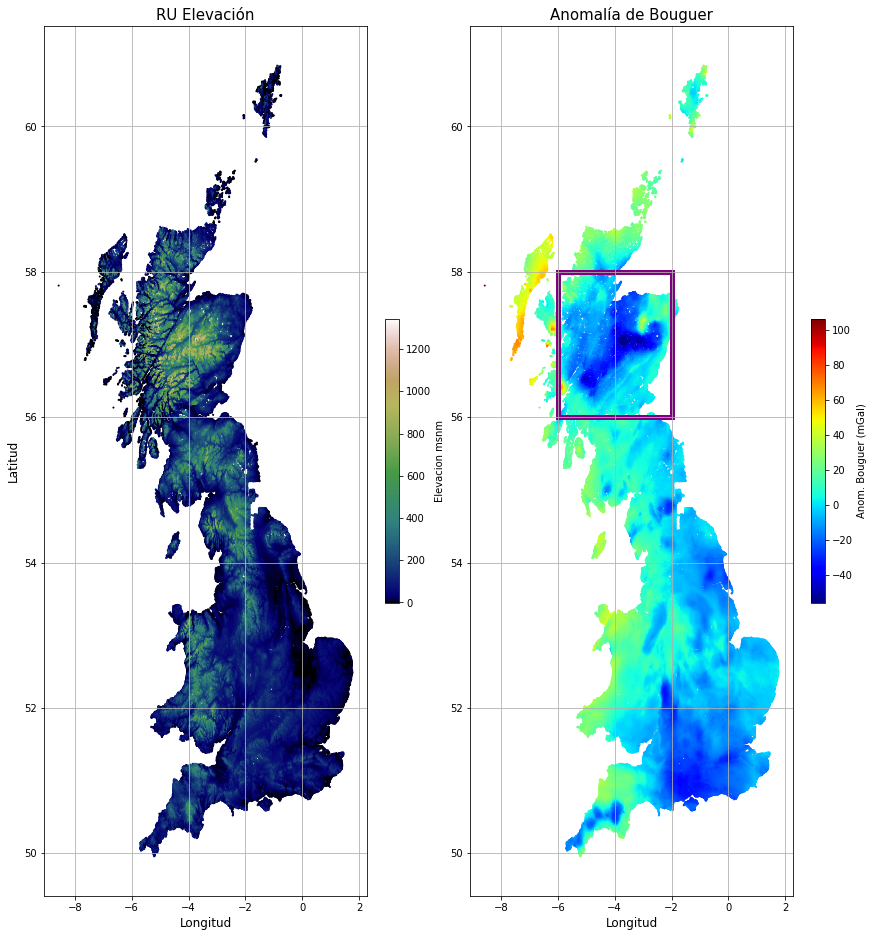

In [28]:
#@markdown **Graficación y Mapeo Topográfico** 

#@markdown - Graficación por nube de puntos sustrayendo del dataset las columnas LATITUD, LONGITUD, BOUGUER_AN

X = df['LONGITUDE']
Y = df['LATITUDE']
Z = df['STATION_ELEV']
Z_p = df['BOUGUER_AN']
plt.figure(figsize=(14,16))
plt.subplot(121)
plt.scatter(X, Y, c=Z, cmap = 'gist_earth', s=1 )
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.title('RU Elevación', fontsize=15)
cbar = plt.colorbar(fraction=0.04)
cbar.set_label('Elevacion msnm')
plt.grid()

plt.subplot(122)
plt.scatter(X, Y, c = Z_p, cmap = 'jet', s=1 )
plt.xlabel('Longitud', fontsize=12)
plt.title('Anomalía de Bouguer', fontsize=15)
cbar1 = plt.colorbar(fraction=0.04)
cbar1.set_label('Anom. Bouguer (mGal)')

left, bottom, width, height = (-6, 56, 4, 2)  #Selected Area
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="purple",
                       linewidth=5)
                       
plt.gca().add_patch(rect)
plt.grid()
plt.show()

En la anterior se muestran los 2 graficos, el mapa de Reino Unido, dando su relieve de elevación (X, Y, Z), y el Mapa que muestra la anomalía de Bouguer dependiendo la región, ahora vease mas claramente como se comporta la anomalia de Bouguer en función de la altura sobre el nivel del mar. Seleccionemos una region del mapa dada por el recuadro

In [6]:
#@markdown **Seleccionamiento de Conjunto de Datos**
df2 = df[(df.LONGITUDE<-2) & (df.LONGITUDE>-6)&(df.LATITUDE>56)&(df.LATITUDE<58)]


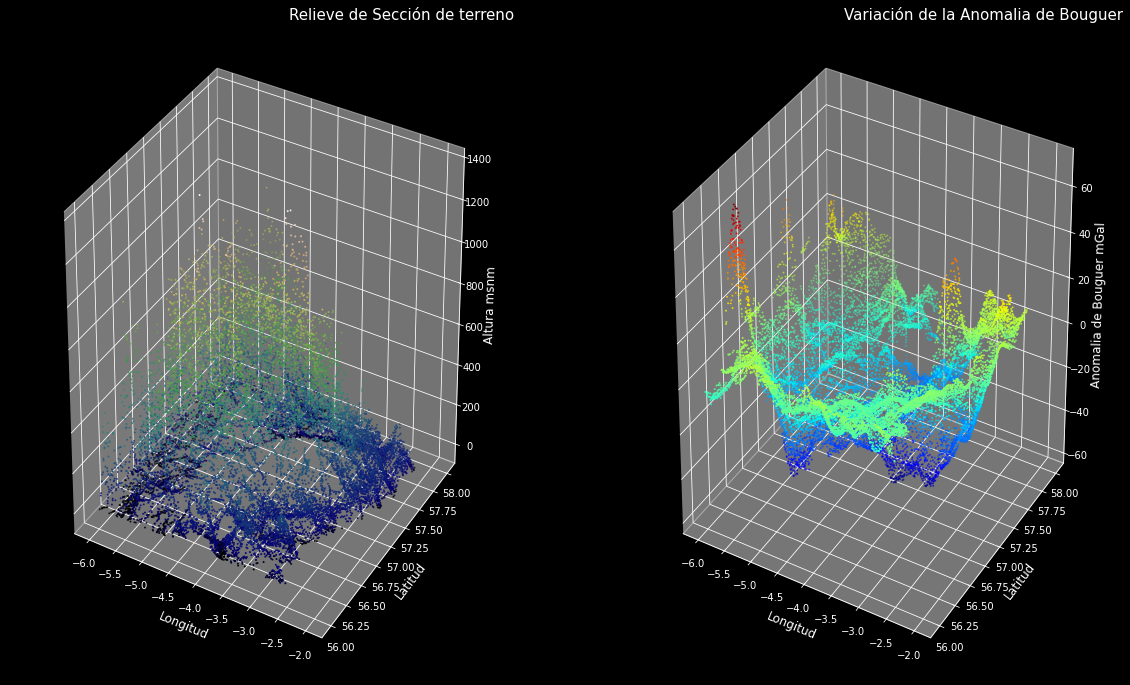

In [60]:
#@markdown **Graficando en 3D DEM**

x, y = df2.LONGITUDE, df2.LATITUDE
z = df2.STATION_ELEV
z_p = df2.BOUGUER_AN

plt.rcParams['axes.prop_cycle']
plt.style.use('dark_background')
fig = plt.figure(figsize=(20,12))
fig.patch.set_facecolor('black')

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x, y, z, c=z, cmap='gist_earth', s=1)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)
ax.set_zlabel('Altura msnm', fontsize=12)
ax.set_title("Relieve de Sección de terreno", fontsize=15, loc='right')
ax.set_facecolor('black') 

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(x, y, z_p, c=z_p, cmap='jet', s=1)
ax2.set_xlabel('Longitud', fontsize=12)
ax2.set_ylabel('Latitud', fontsize=12)
ax2.set_zlabel('Anomalia de Bouguer mGal', fontsize=12)
ax2.set_title("Variación de la Anomalia de Bouguer", fontsize=15, loc='right')
ax2.set_facecolor('black')
plt.draw()
plt.show()

Del anterior conjunto de figuras se puede analizar que la anomalía de Bouguer se comporta inversamente proporcional a la altura sobre el nivel del mar de la superficie y es negativa en las partes mas elevadas del terreno, en las partes mas cercanas a la costa esta anomalia se reduce considerablemnte aproximaendo el valor medido de gravedad al valor real.

Estos analisis graficos nos permiten realizar un analisis cualitativo y cuantitativo de una situación como lo es el comportamiento de la gravedad en un lugar predeterminado segun la altura.

El anterior análisis soportado en las figuras y gráficas de relieve da cuenta de las herramientas gráficas con la cuales cuenta python, en este caso por medio de su libreria matplotlib, donde solo haciendo uso de la misma se pudieron obtener resultados muy prometedores en cuanto a los resultados graficos esperados.

Los anteriores datos fueron tomados de analisis satelitales de Reino Unido, y se quiere mostrar que Python puede ser adaptado y usado como un herramienta de análisis y procesamiento de datos LIDAR y mapeo topografico, además agregando que Python cuenta con librerias dedidacadas al manejo de este tipo de datos como los PyLIDAR y pylas.

Este ejercicio se enfoca principalmente en explotar las capacidades graficas del entorno de progamación las cuales dejan satisfacción para seguir utilizandolo, donde próximamente se espera implementarlo en una situación real haciendo análisis con la tecnologia LIDAR y evaluar su desempeño.

Dentro de los errores e incovenientes encontrados esta la limitacion de memoria que esta predeterminada por el entorno de ejecución, y pretender arrojar una gran cantidad de datos para ser graficados en un grafico DEM se hace tortuoso ya que el entorno de ejecución se desconecta por superar esta cuota de memoria, en la misma vía por eso se elige una seccion de la zona mapeada.

-------------------------------------
##REFERENCIAS
https://dataunderground.org/dataset/great-britain-land-gravity-survey

https://slideplayer.es/slide/4134929/

https://glossary.oilfield.slb.com/es/terms/b/bouguer_correction

https://www.routescene.com/software/lidar-software/

https://pylas.readthedocs.io/en/latest/

http://www.pylidar.org/en/latest/lidarprocessor.html



